## Importing The Packages

In [ ]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
%matplotlib inline

## Loading The Data

In [ ]:
from google.colab import files
import io

uploaded = files.upload()

Saving Geom(1).csv to Geom(1).csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['Geom(1).csv']))

In [ ]:
dataset.head()

,,.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121
0,82,0,81.55081,8.571335,80.20810,17.04875,77.98663,25.33940,74.91074,33.35240,71.01407,41.0,66.33939,48.19839,60.93787,54.86871,54.86871,60.93787,48.19839,66.33939,41.0,71.01410,33.35242,74.91074,25.33939,77.98663,17.04877,80.2081,8.57132,81.55081,0.0,82,-8.57135,81.55081,-17.04877,80.2081,-25.33939,77.98663,-33.35242,74.91074,...,-33.35257,-74.91064,-25.33960,-77.98657,-17.04898,-80.20805,-8.571564,-81.55077,-0.000244,-82,8.571106,-81.55083,17.04852,-80.20816,25.33914,-77.98671,33.35214,-74.91084,40.99976,-71.01422,48.19815,-66.33957,54.86850,-60.93808,60.93768,-54.86894,66.33920,-48.19865,71.01392,-41.00029,74.91058,-33.35272,77.98654,-25.33972,80.20804,-17.04910,81.55075,-8.571701,82,-0.000381
1,82,0,81.55078,8.571320,80.20813,17.04877,77.98663,25.33939,74.91071,33.35242,71.01410,41.0,66.33942,48.19839,60.93787,54.86871,54.86871,60.93787,48.19836,66.33939,41.0,71.01410,33.35242,74.91074,25.33942,77.98663,17.04877,80.2081,8.57135,81.55081,0.0,82,-8.57135,81.55081,-17.04877,80.2081,-25.33942,77.98663,-33.35242,74.91074,...,-33.35260,-74.91064,-25.33960,-77.98657,-17.04895,-80.20807,-8.571533,-81.55078,-0.000244,-82,8.571106,-81.55081,17.04852,-80.20816,25.33917,-77.98672,33.35217,-74.91083,40.99976,-71.01422,48.19818,-66.33957,54.86847,-60.93808,60.93768,-54.86893,66.33923,-48.19864,71.01392,-41.00027,74.91058,-33.35272,77.98651,-25.33972,80.20801,-17.04910,81.55078,-8.571686,82,-0.000366
2,129,0,128.29330,13.484180,126.18100,26.82060,122.68630,39.86319,117.84740,52.46902,111.71730,64.5,104.36320,75.82431,95.86566,86.31784,86.31787,95.86569,75.82428,104.36320,64.5,111.71730,52.46899,117.84740,39.86316,122.68630,26.82062,126.1810,13.48419,128.29330,0.0,129,-13.48419,128.29330,-26.82062,126.1810,-39.86322,122.68630,-52.46906,117.84740,...,-52.46930,-117.84720,-39.86353,-122.68620,-26.82092,-126.18100,-13.484500,-128.29330,-0.000366,-129,13.483760,-128.29340,26.82019,-126.18110,39.86279,-122.68640,52.46863,-117.84750,64.49963,-111.71750,75.82391,-104.36350,86.31750,-95.86600,95.86536,-86.31821,104.36290,-75.82471,111.71700,-64.50044,117.84720,-52.46951,122.68610,-39.86371,126.18090,-26.82115,128.29330,-13.484740,129,-0.000595
3,108,0,107.40840,11.289080,105.64000,22.45447,102.71410,33.37384,98.66290,43.92755,93.53076,54.0,87.37384,63.48080,80.25964,72.26611,72.26611,80.25964,63.48083,87.37384,54.0,93.53075,43.92755,98.66292,33.37384,102.71410,22.45447,105.6399,11.28906,107.40840,0.0,108,-11.28906,107.40840,-22.45447,105.6399,-33.37384,102.71410,-43.92755,98.66290,...,-43.92780,-98.66280,-33.37408,-102.71400,-22.45471,-105.63990,-11.289370,-107.40830,-0.000305,-108,11.288760,-107.40840,22.45416,-105.64000,33.37354,-102.71420,43.92725,-98.66306,53.99969,-93.53093,63.48047,-87.37406,72.26581,-80.25990,80.25940,-72.26641,87.37360,-63.48115,93.53052,-54.00037,98.66272,-43.92796,102.71400,-33.37427,105.63980,-22.45493,107.40830,-11.289550,108,-0.000504
4,145,0,144.20570,15.156620,141.83140,30.14719,137.90320,44.80746,132.46410,58.97681,125.57370,72.5,117.30750,85.22885,107.75600,97.02393,97.02

In [ ]:
#maximum point in the dataset
dataset.max().max()

145.0

In [ ]:
train_X = dataset[:17]
test_X = dataset[17:]

## Creating The Model

In [ ]:
encoding_dim = 30  # 30 floats -> compressed from 122 point

# This is our input image
input_img = keras.Input(shape=(122,))

# Hidden layer in the encoded model
hidden = layers.Dense( 80 , activation = keras.layers.LeakyReLU(alpha=1) ) (input_img)

# "encoded" is the encoded representation of the input
encoded = layers.Dense( encoding_dim, activation = keras.layers.LeakyReLU(alpha=1) )(hidden)

# Hidden layer in the decoded model
hidden_2 = layers.Dense( 80 , activation = keras.layers.LeakyReLU(alpha=1) ) (encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(122, activation= keras.layers.LeakyReLU(alpha=1) )(hidden_2)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (60-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Clone of the decoder hidden layer 
decoder_hidden = autoencoder.layers[-2](encoded_input)
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1](decoder_hidden)
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
print("Autoencoder Model")
autoencoder.summary()
print("=============================\n")

print("Encoder Model")
encoder.summary()
print("=============================\n")

print("Decoder Model")
decoder.summary()
print("=============================")


Autoencoder Model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense (Dense)               (None, 80)                9840      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 80)                2480      
                                                                 
 dense_3 (Dense)             (None, 122)               9882      
                                                                 
Total params: 24,632
Trainable params: 24,632
Non-trainable params: 0
_________________________________________________________________

Encoder Model
Model: "model_1"
_______

### Training  The Model

In [ ]:
autoencoder.fit(train_X, train_X,
                epochs=100,
                batch_size=256,
                shuffle=True,
                )

Epoch 1/100
1/1 [==============================] - 1s 648ms/step - loss: 8777.8604
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 6432.7915
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 5244.4160
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 4747.5835
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 4518.8726
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 4300.3418
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 4009.9990
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 3659.6401
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 3284.6641
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 2913.7947
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 2561.1401
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 2231.3616
Epoch 13/100
1/1 [=

### Generating Unseen Circles

In [ ]:
encoded_circles = encoder.predict(test_X)
decoded_circles = decoder.predict(encoded_circles)

In [ ]:
decoded_circles.shape


(5, 122)

### Calculate The Error 

In [ ]:
autoencoder.evaluate(decoded_circles , test_X)
w = autoencoder.get_weights()
weights = []
#w[0][:,:1] = 0
w[1][:] = 0
updated_weight = w[0]
updated_bias = w[1]
weights.append(updated_weight)
weights.append(updated_bias)
autoencoder.assign_weights(weights)

#print(weights)
#print(w)


1/1 [==============================] - 0s 19ms/step - loss: 0.1093


AttributeError: ignored

## Data Visualization

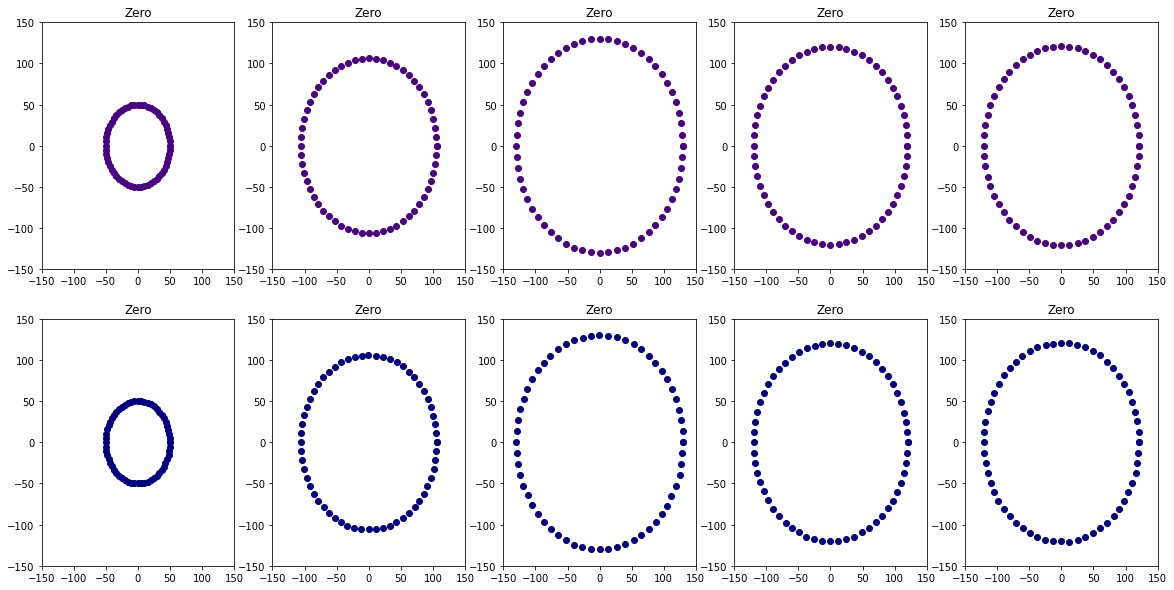

In [ ]:
# Visualize Original Circles and Generated Circles below original ones

n = 5  # How many digits we will display
plt.figure(figsize=(20, 10))
for i in range(n):
    # Display original
    original_X_points , original_y_points = test_X.iloc[i][::2] , test_X.iloc[i][1::2] 
    ax = plt.subplot(2, n, i + 1)
    plt.xlim([-150, 150])
    plt.ylim([-150,150])
    plt.title("Zero")
    plt.scatter(original_X_points, original_y_points ,  color='indigo')

    # Display reconstruction
    
    predicted_X_points , predicted_y_points = decoded_circles[i][::2] , decoded_circles[i][1::2] 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.xlim([-150, 150])
    plt.ylim([-150,150])
    plt.title("Zero")
    plt.scatter(predicted_X_points, predicted_y_points ,  color='navy')
    
plt.show()

